# Test Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


In [4]:
from scipy.optimize import curve_fit

## Creating/Loading detector with misalignment

In [5]:
#mu3e_detector = Detector.initFromROOT("./run42_20000.root")
mu3e_detector = Detector.initFromSave("cal_cosmic_best.det")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


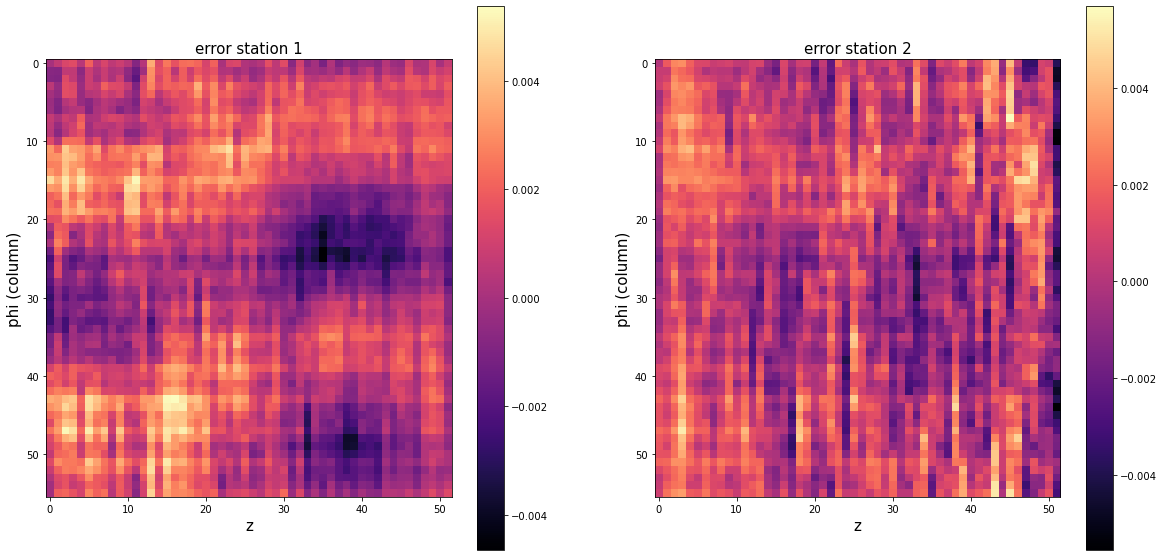

Station 1: max error:  0.00537  min error:  -0.00464
Station 2: max error:  0.00569  min error:  -0.00555


In [6]:
melp.taft.plot_calibration(mu3e_detector)

In [7]:
melp.taft.select(mu3e_detector)

In [8]:
options={
    "ttree_loc": "alignment/mu3e", # "alignment/mu3e",
    "mc_primary": True,
    "mode": "test tof",
    "offset": 20
}
# /run/media/maximilian/Volume/Cosmics_Dev
#hist = melp.taft.station_station_timing('/home/maximilian/mu3e_sorted_000334.root', mu3e_detector, **options)
#hist = melp.taft.station_station_timing('/run/media/maximilian/Volume/Cosmics_Dev/merged_11_17.root', mu3e_detector, **options)
hist = melp.taft.station_station_timing('/run/media/maximilian/Volume/mu3e_sorted_000002_cosmic.root', mu3e_detector, **options)

/home/maximilian/Github/melp/melp/taft/utils/cosmic.py:105: UserWarning: NOT WORKING
  warnings.warn("NOT WORKING")


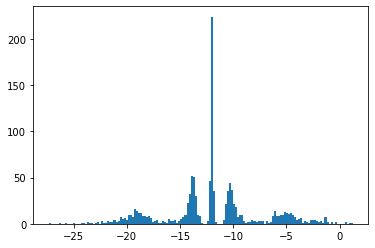

In [9]:
plt.hist(hist, bins=150)#, range=(-20.75,-19.25))#, range=(-10.5,-9.5))
plt.show()

## get mean and remove unusable data

In [23]:
mean = np.mean(hist)
median = np.median(hist)
range_around_mean = (mean - 0.5, mean + 0.5)
print("mean: ", mean, " | median: ", median)

mean:  -12.00733783166884  | median:  -12.018981673129405


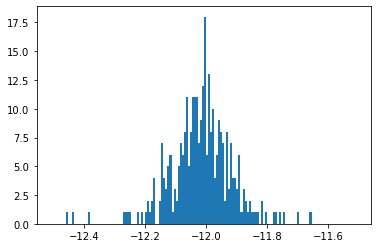

In [24]:
hist_1 = plt.hist(hist, bins=150, range=range_around_mean)
plt.show()

bin_centers=np.asarray(((hist_1[1][:-1] + hist_1[1][1:]) / 2))

In [15]:
def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [21]:
coeff, var_matrix = curve_fit(gauss, bin_centers, hist_1[0], p0=[mean,1,1])

-12.0155157523548


In [18]:
coeff

array([-12.01248712,   0.07835397,   9.99532009])

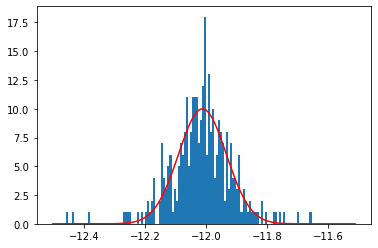

In [19]:
plt.hist(hist, bins=150, range=range_around_mean)
plt.plot(bin_centers,gauss(bin_centers, coeff[0], coeff[1], coeff[2]), color="red")
plt.show()

In [28]:
coeff[1]/np.sqrt(sum(hist_1[0]))

0.004443045755699471

In [ ]:
print(mu3e_detector.TileDetector.tile[200000].pos[2]-mu3e_detector.TileDetector.tile[302856].pos[2])
print(mu3e_detector.TileDetector.tile[202856].pos[2]-mu3e_detector.TileDetector.tile[300000].pos[2])